#TP 2 : Dosage par étalonnage conductimétrique

In [ ]:
#bibliothèques
import numpy as np
import matplotlib.pyplot as plt
from math import*

# Réponse aux questions préliminaires

In [ ]:
#parametres
m=0.5
M=58.44
#calcul de la concentration du sérum
c_serum=0.9/(0.1*M)
c_theo=c_serum/20
print('c serum=',c_serum,'c theo=',c_theo)

c serum= 0.1540041067761807 c theo= 0.007700205338809035


$c_{serum}=1,54 \times 10^{-1} \, \mathrm{mol.L^{-1}}$
$c_{theo}=7,70 \times 10^{-3} \, \mathrm{mol.L^{-1}}$

2. Sans diluer nous ne sommes pas dans le domaine de valididté de la loi de Kohlrausch

3. $\sigma=(\lambda_1+\lambda_2)\times C_0$


In [ ]:
VmereSi=np.array([10,10,20,5,25,25])*1e-3
VfilleSi=np.array([50,100,50,100,100,50])*1e-3
VmereS0=250.*1e-3

ci=m*VmereSi/(VmereS0*VfilleSi*M)
print('Concentration des solutions filles')
print(ci)

Concentration des solutions filles
[0.00684463 0.00342231 0.01368925 0.00171116 0.00855578 0.01711157]


In [ ]:
#calcul de c0
c0=m/(VmereS0*M)
print(c0)

0.034223134839151265


7. $c_0=3,4 \times 10^{-2} \, \mathrm{mol.L^{-1}}$

# Courbe d'étalonnage

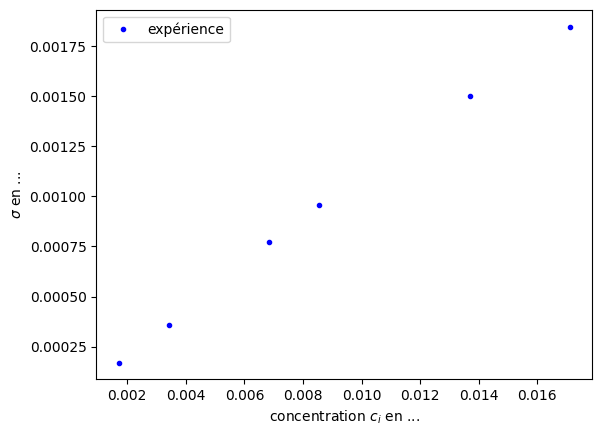

In [ ]:
#paramètres
sigma=np.array([771e-6,358e-6,1500e-6,171e-6,958e-6,1847e-6])

#concentration des solutions fille
#soit effectuer le calcul soit directement les valeurs
#ci=np.array([0.01,0.0075,0.005,0.0025,0.001])

#graphique
plt.figure(dpi=100)
plt.plot(ci,sigma,'b.',label='expérience')

plt.xlabel('concentration $c_i$ en ...')
plt.ylabel('$\sigma$ en ...')
plt.legend()
plt.show()

Les points semblent se répartir aléatoirement autour d'une droite passant par l'origine, on peut le vérifier en faisant une régressin avec une fonction linéaire (difficile avec python) ou calculer le coefficient directeur et tracer la droite pour voir. Nous allons utiliser la deuxième méthode.

##Analyse statistique
On note $\alpha$ le coefficient de proportionnalité

La valeur moyenne du coefficient directeur est :  0.10777797
Incertitude type sur la valeur moyenne est : 0.0008031558760726343


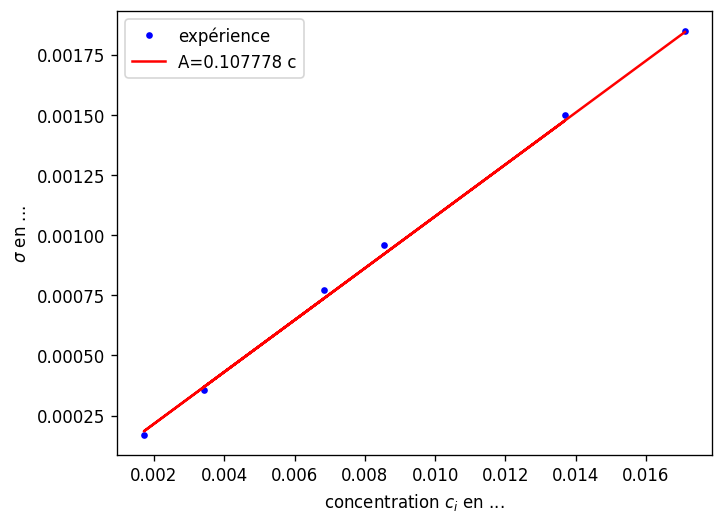

In [ ]:
alpha=sigma/ci
moy_alpha=np.mean(alpha)
print('La valeur moyenne du coefficient directeur est : ',moy_alpha)
u_alpha_moy=np.std(alpha,ddof=1)/len(alpha)
print('Incertitude type sur la valeur moyenne est :', u_alpha_moy)

#graphique
plt.figure(dpi=120)
plt.plot(ci,sigma,'b.',label='expérience')
plt.plot(ci,moy_alpha*ci,'r-',label='A=%f c'%moy_alpha)
plt.xlabel('concentration $c_i$ en ...')
plt.ylabel('$\sigma$ en ...')
plt.legend()
plt.show()

La loi de Kohlraush est validée pour des concentrations allant jusqu'à 0.020 mol/L comme prévu.

13. Kohlrausch semble cérifié les points sont très proches d'une droite et aléatoirement répartis autour de celle-ci

14 - mesurer $\sigma_{exp}$ du sérum dilué 20 fois - faire une lecture graphique ou utiliser l'équation pour déterminer $c_{exp}$

In [ ]:
#nouveau paramètres
sigma_exp=858e-6
#calcul de la concentration du sérum par lexpérience
c_exp=(sigma_exp)/moy_alpha
print('cexp=',c_exp,'mol/L')

cexp= 0.007960810544121401 mol/L


##Traitement des incertitudes



In [ ]:
#incertitude type sur sigma
u_sigma_exp=.5/100*sigma_exp+2*1e-6
print('Incertitude type sur sigma :',u_sigma_exp)
#incertitude type sur alpha
#déjà calculée plus haut

#incertitude type composée sur c_exp
u_c_exp=c_exp*np.sqrt((u_sigma_exp/sigma_exp)**2+(u_alpha_moy/moy_alpha)**2)
print('incertitude type sur c_exp',u_c_exp)

#incertitude type composée sur c_serum
u_c_serum=20*c_exp*np.sqrt((u_sigma_exp/sigma_exp)**2+(u_alpha_moy/moy_alpha)**2)
print('incertitude type sur c_exp',u_c_serum)

Incertitude type sur sigma : 6.290000000000001e-06
incertitude type sur c_exp 8.321813066937381e-05
incertitude type sur c_exp 0.0016643626133874764


Zscore

In [ ]:
#calcul de z
z=(c_exp-c_theo)/u_c_exp
print(z)

3.1315916761907565


Les deux valeurs sont non compatibles, ce qui peut sembler surprenant.
La valeurs de la tolérence donnée par le constructeur du conductimètre est très faible.